In [275]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Import and merge datasets

In [293]:
df = pd.read_csv('data/Olympics_Games.csv')
medal = pd.read_csv('data/Olympic_Games_Medal_Tally.csv')
country = pd.read_excel('data/olympic_city_country.xlsx')
place = pd.read_csv('data/nocRegions.csv')

newdf1 = df[['year','city']].merge(medal[['year','country','total']], how='right')

gpd = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv',skiprows=[0,1,2])
gpd=gpd.fillna(0)
newdf1.head(4)

year    city        country  total
0  1896  Athina  United States     20
1  1896  Athina         Greece     47
2  1896  Athina        Germany     13
3  1896  Athina         France     11

# data pre-processing 

In [294]:
newdf1['country'][newdf1['country']=='Great Britain']='United Kingdom'
newdf1['country'][newdf1['country']=='West Germany']='Germany'
newdf1.isnull().sum()

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


year       0
city       0
country    0
total      0
dtype: int64


#  Does hosting the Olympic games and the country's economy affect its performance?


In [295]:
import plotly.express as px
import plotly.io as pio

In [296]:
newdf1.head(4)

year    city        country  total
0  1896  Athina  United States     20
1  1896  Athina         Greece     47
2  1896  Athina        Germany     13
3  1896  Athina         France     11

In [297]:
pd.unique(newdf1['year'])

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016, 2020, 1994, 1998, 2002, 2006,
       2010, 2014, 2018, 2022])

In [298]:
country = country.rename(columns={'City': 'city'})
newdf1 = newdf1.rename(columns={'total': 'Medal number', "Country": 'Host country'})
newdf = newdf1.merge(country, how='right').dropna()
newdf = newdf.rename(columns={"Country": 'Host country'})
newdf.head(4)

year   city         country  Medal number Host country
1  1900.0  Paris          France         111.0       France
2  1900.0  Paris   United States          48.0       France
3  1900.0  Paris  United Kingdom          38.0       France
4  1900.0  Paris         Belgium          18.0       France

# number of medal won by each country

In [299]:
tmp = newdf.groupby(['country'])['Medal number'].sum()
df4 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()
df4.head(4)

country  Medal
0  Afghanistan    4.0
1      Algeria   25.0
2    Argentina  159.0
3      Armenia   22.0

## a) Number of  olympic games host by country

In [300]:
tmp = newdf.drop_duplicates(subset=['year'])
tmp = tmp.groupby(['Host country'])['Host country'].value_counts()
l= [tmp.index[i][0] for i in range(len(tmp))]
t = {"host country": l,'Number games hosted':tmp.values }
seasoncount = pd.DataFrame(t)
seasoncount.head()

host country  Number games hosted
0    Australia                    1
1      Austria                    2
2      Belgium                    1
3       Brazil                    1
4       Canada                    2

## b) Top 12 world countries that have won more medial and hosted at least one Olympic game.

In [316]:
pg =df4[df4['country'].isin(list(seasoncount['host country']))]
pg= pg.rename(columns={"country": 'host country'})
l = pg.merge(seasoncount, how='right').dropna()
GPD=gpd[gpd['Country Name'].isin(list(seasoncount['host country']))]
GPD = GPD.sort_values(by=['2021'],ascending=False)
pfd = pd.DataFrame({'host country': GPD['Country Name'], 'GPD rank':[i for i in range(1,len(GPD['Country Name'])+1)]})

In [320]:
ll = l.merge(pfd, how='right').dropna()
ll =ll.sort_values(by=['Medal'],ascending=False)
o = ll['GPD rank'].values.astype(str) # record the worlg GPD rank of the country
rank=["{in1} {in2}".format(in1='Country world GPD rank:', in2=o[i]) for i in range(len(o))]
ll['rank']=rank

fig = px.bar(ll, x="Medal", y="host country", color="Number games hosted",pattern_shape="rank",text='Medal',
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1986-2022.",
labels={ # replaces default labels by column name
                "count": "Number of Olympic games hosted"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=1.08
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



In [81]:
cont = newdf.groupby('Country')['Country'].value_counts()
l = pd.unique(newdf['Country'].sort_values())
pfd = pd.DataFrame({'Team':l, 'count':cont.values})
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()

l = df5.merge(pfd, how='right').dropna()
l =l.sort_values(by=['Medal'],ascending=False)
l["count"] = l["count"].astype("category")
l = l.head(12)
pg =gpd[gpd['Country Name'].isin(list(l['Team']))]
pg = pg.sort_values(by=[2016,2015],ascending=False)
pfd = pd.DataFrame({'Team':list(pg['Country Name'].head(12)), 'Oder':[i for i in range(1,13)]})
ll = l.merge(pfd, how='right').dropna()
ll =ll.sort_values(by=['Medal'],ascending=False)

o = ll['Oder'].values.astype(str) # record the worlg GPD rank of the country

rank=["{in1} {in2}".format(in1='Country world GPD rank:', in2=o[i]) for i in range(len(o))]
ll['rank']=rank
fig = px.bar(ll, x="Medal", y="Team", color="count",pattern_shape="rank",text='Medal',
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1900-2016.",
labels={ # replaces default labels by column name
                "count": "Number of Olympic games hosted"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=1.08
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



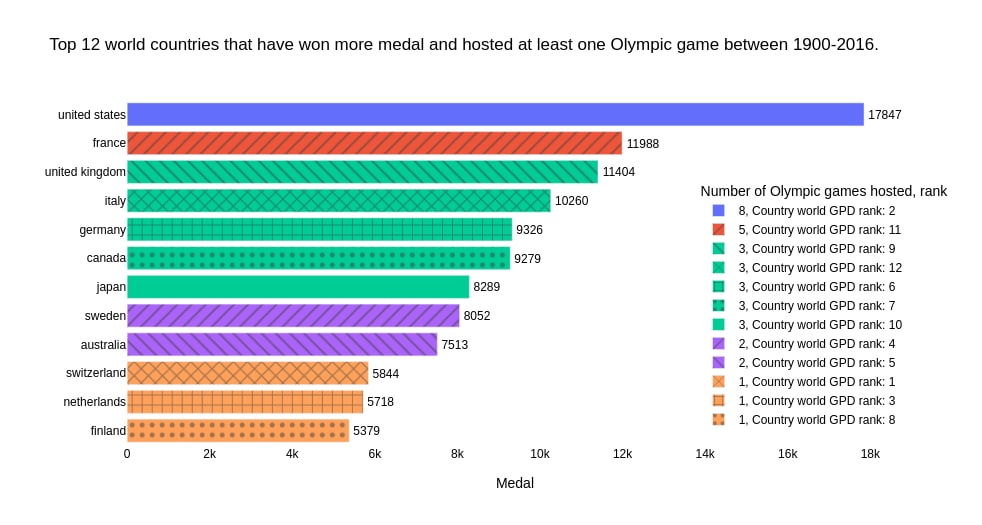

In [82]:
cont = newdf.groupby('Country')['Country'].value_counts()
l = pd.unique(newdf['Country'].sort_values())
pfd = pd.DataFrame({'Team':l, 'count':cont.values})
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()

l = df5.merge(pfd, how='right').dropna()
l =l.sort_values(by=['Medal'],ascending=False)
l["count"] = l["count"].astype("category")
l = l.head(12)
pg =gpd[gpd['Country Name'].isin(list(l['Team']))]
pg = pg.sort_values(by=[2016,2015],ascending=False)
pfd = pd.DataFrame({'Team':list(pg['Country Name'].head(12)), 'Country world GPD rank':[i for i in range(1,13)]})
ll = l.merge(pfd, how='right').dropna()
ll =ll.sort_values(by=['Medal'],ascending=False)

o = ll['Country world GPD rank'].values.astype(str) # record the worlg GPD rank of the country

rank=["{in1} {in2}".format(in1='Country world GPD rank:', in2=o[i]) for i in range(len(o))]
ll['rank']=rank
fig = px.bar(ll, x="Medal", y="Team", color="count",pattern_shape="Country world GPD rank",text='Medal',
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1900-2016.",
labels={ # replaces default labels by column name
                "count": "Number of Olympic games hosted"
            })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=1.08
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend= dict(font = dict(size = 10)),
    title_font_color="black",)
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



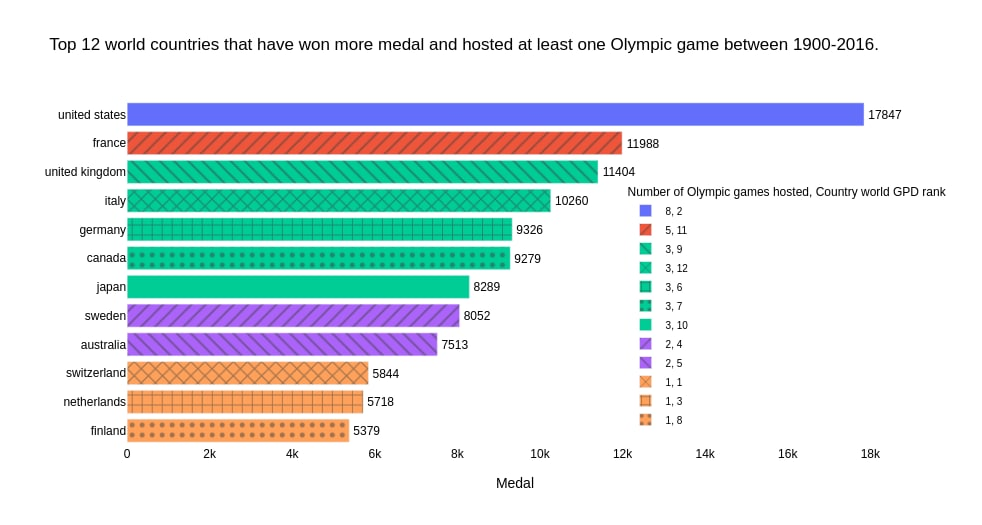

 For example, you might use color to highlight specific columns for storytelling. Colors can also be used if they are meaningful for the categories posted (e.g. to match company or team colors).

## c) Top African countries that have won more medail 

**If the Olympic performance of the riches countries is affected by the place where the games were organised. Therefore what about the country that can not organise the Olympic games?**

In [141]:
pga =gpd[gpd['Country Name'].isin(['cameroon','nigeria','algeria','south africa','kenya','ethiopia','ghana'])]
pga = pga.sort_values(by=[2016,2015],ascending=False)

In [142]:
fda = pd.DataFrame({'Team':list(pga['Country Name']), 'Country Africa GPD rank':[i for i in range(1,len(pga)+1)]})

In [143]:
fda

Team  Country Africa GPD rank
0       algeria                        1
1  south africa                        2
2       nigeria                        3
3         ghana                        4
4      cameroon                        5
5         kenya                        6
6      ethiopia                        7

<Figure size 500x1000 with 0 Axes>

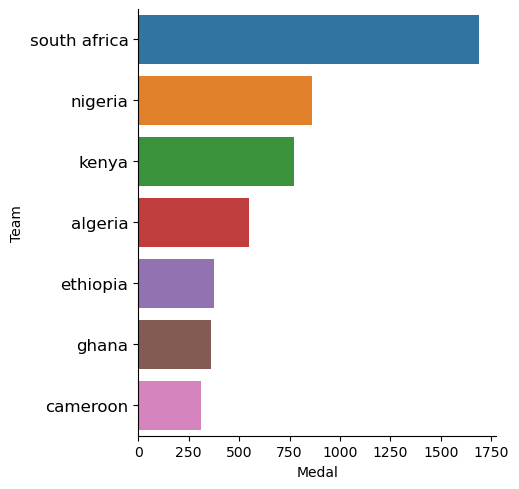

In [144]:
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()
l =df5.sort_values(by=['Medal'],ascending=True)
l = l[(l['Team'] =='cameroon' )| (l['Team'] =='nigeria')| (l['Team'] =='algeria')|(l['Team'] =='south africa')| (l['Team'] =='kenya')|(l['Team'] =='ethiopia')|(l['Team'] =='ghana' )]
#l = l.head(12)
o = l.sort_values(by=['Medal'],ascending=False)
plt.figure(figsize=(5,10))
sns.catplot(data=o, x="Medal", y="Team", kind="bar")
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

# there is something wrong with the plot

# Trend of the nomber of medal for the 10 top countries that have gain more medal

In [ ]:
tmp = df.groupby(['Year', 'Team', 'City'])['Medal'].agg('count').dropna()
df6 = pd.DataFrame(tmp).reset_index()
l =df6.sort_values(by=['Medal'],ascending=False)
newdfl = l.merge(country, how='right').dropna()
newdfl = newdfl.sort_values(by=['Year'])
df8= newdfl.copy()

In [ ]:

#newdfl= newdfl[newdfl['Year']>2000]

for i in pd.unique(newdfl['Country']):
    place =np.array([])
    for j in range(len(newdfl['Country'])):
        if(newdfl['Country'].iloc[j]==i):
            place = np.append(place,str('home'))
        else:
            place = np.append(place,str('away'))
    df8[i]=list(place)
            


In [ ]:
df8

# parallel plot

In [ ]:

newdfl= newdfl[newdfl['Year']>2000]

for i in pd.unique(newdfl['Country']):
    place =np.array([])
    for j in range(len(newdfl['Country'])):
        if(newdfl['Country'].iloc[j]==i):
            place = np.append(place,str('home'))
        else:
            place = np.append(place,str('away'))
    break
            


In [ ]:
len(place)

In [ ]:

temp = newdfl[newdfl['Team']==i]
temp= temp.drop_duplicates()
temp

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
tem = temp[['Medal']]

In [ ]:
l =tem.T
l.columns = temp['Year']
l['label'] = ['Medal']

In [ ]:
parallel_coordinates(l, "label")

In [ ]:
from plotnine import*

In [ ]:

ggplot(temp)+aes(x='Year', y= 'Medal') + geom_point()+geom_line()

1. Host Country Effect- What is the probability that a participant of the host country can win a medal? Are there any type of sports that the host country has more chance of winning?

2. Economic Effect- Are there any sports that are won mostly by countries with low GDP? Does the rise/fall in economy affect the Olympic winnings of a country, and if so, in how many years is the effect seen?

3. Age Effect- Does the Relative Age Effect influence Olympic winnings? At what age is optimum age for each sport? How does the performance of each athlete improve/degrade over time?

Moreover, looking at the medals count in Olympics official site[4] and comparing with the Olympics history dataset used in this report, there are discrepancies, hence the dataset needs to be revised.